In [65]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

# K-Means

In [66]:
df = pd.read_csv("USArrests.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [67]:
df.index = df.iloc[:,0] # Tüm gözlemlerin 0. indeksindeki verisini getir.

In [68]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [69]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [70]:
df = df.iloc[:,1:5] # Tüm gözlemlerin 1. indeksinden 4. indeksine kadarki verileri getir.

In [71]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [72]:
# del df.index.name

In [73]:
df.index.name = ""

In [74]:
df.head()

,Murder,Assault,UrbanPop,Rape
,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [75]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


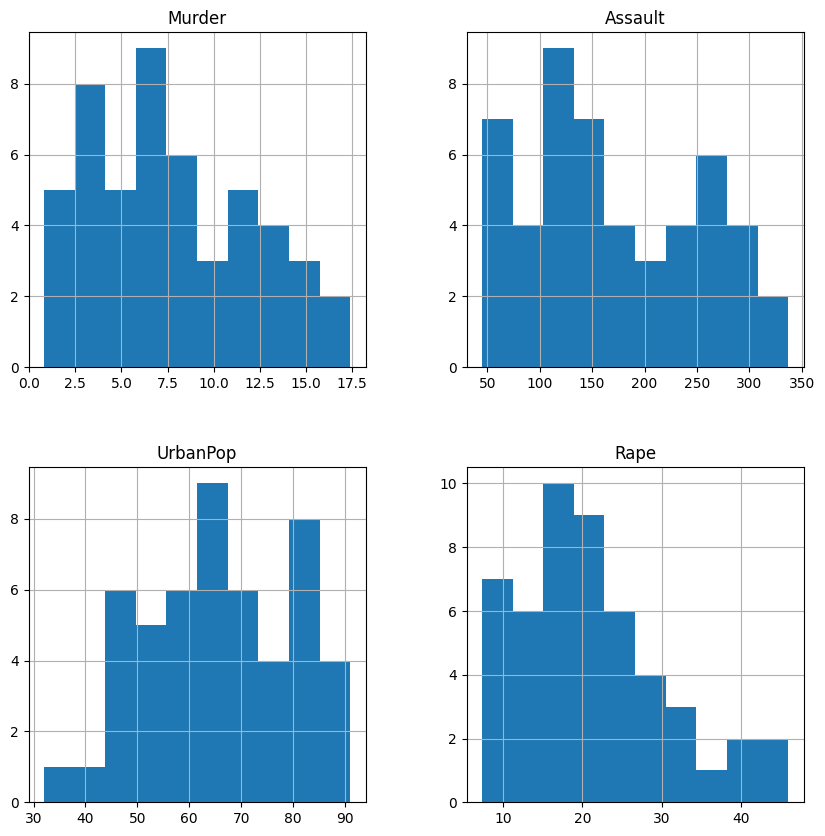

In [78]:
df.hist(figsize = (10, 10));

## K-MEANS Model ve Görselleştirme

In [79]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [80]:
# "?kmeans" dökümantasyonu gösterir yani parametreleri ve açıklamalarını gösterir.
# Bende nedense hata veriyor.

In [81]:
k_fit = kmeans.fit(df)

In [82]:
k_fit.n_clusters

4

In [83]:
k_fit.cluster_centers_

array([[  4.16111111,  83.94444444,  57.77777778,  13.52777778],
       [ 12.03333333, 239.25      ,  69.16666667,  28.5       ],
       [  6.73076923, 157.69230769,  71.23076923,  21.08461538],
       [ 11.8       , 300.85714286,  68.71428571,  28.85714286]])

In [84]:
k_fit.labels_

array([1, 1, 3, 2, 3, 1, 0, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 3, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 3, 1, 3, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2,
       0, 2, 2, 0, 0, 2])

# Görselleştirme

In [85]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [86]:
kumeler = k_fit.labels_

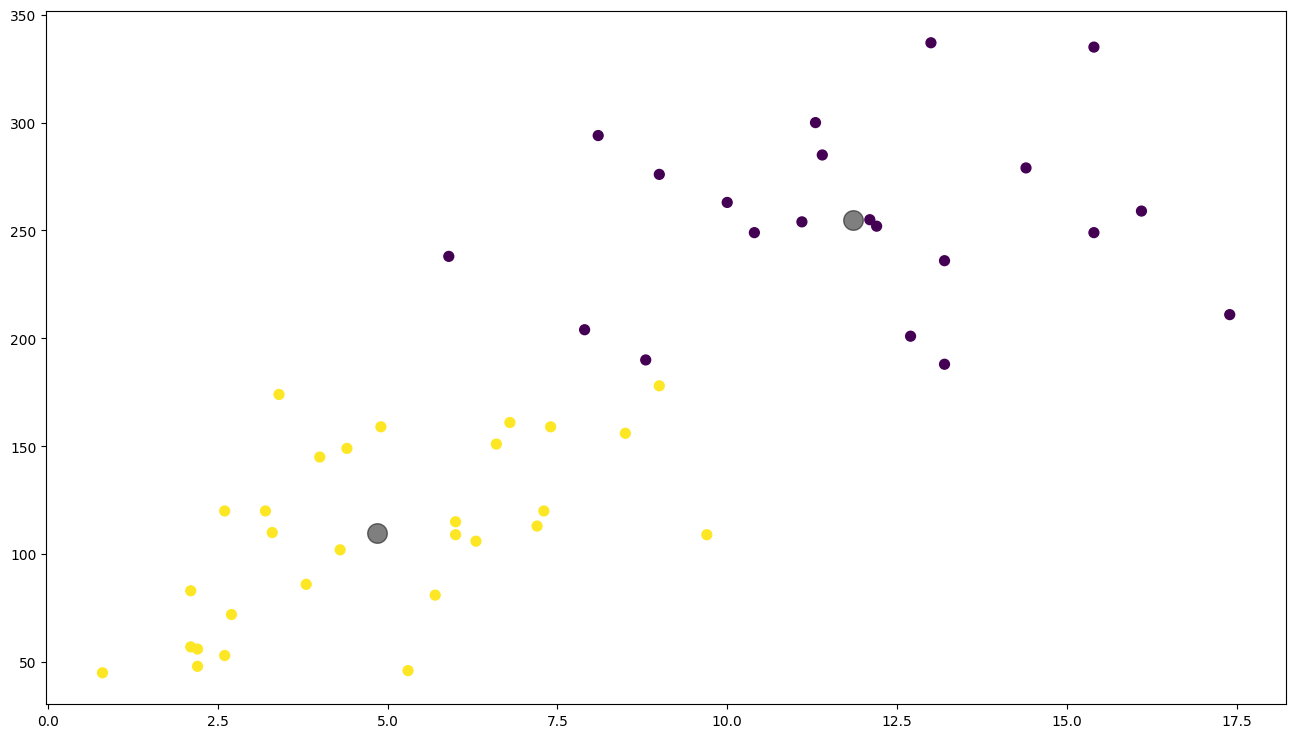

In [87]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s=50, cmap="viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s=200, alpha=0.5);

In [88]:
df.iloc[:,0]


Alabama           13.2
Alaska            10.0
Arizona            8.1
Arkansas           8.8
California         9.0
Colorado           7.9
Connecticut        3.3
Delaware           5.9
Florida           15.4
Georgia           17.4
Hawaii             5.3
Idaho              2.6
Illinois          10.4
Indiana            7.2
Iowa               2.2
Kansas             6.0
Kentucky           9.7
Louisiana         15.4
Maine              2.1
Maryland          11.3
Massachusetts      4.4
Michigan          12.1
Minnesota          2.7
Mississippi       16.1
Missouri           9.0
Montana            6.0
Nebraska           4.3
Nevada            12.2
New Hampshire      2.1
New Jersey         7.4
New Mexico        11.4
New York          11.1
North Carolina    13.0
North Dakota       0.8
Ohio               7.3
Oklahoma           6.6
Oregon             4.9
Pennsylvania       6.3
Rhode Island       3.4
South Carolina    14.4
South Dakota       3.8
Tennessee         13.2
Texas             12.7
Utah      

In [89]:
merkezler[:,0]

array([11.85714286,  4.84137931])

In [90]:
from mpl_toolkits.mplot3d import Axes3D

In [91]:
# !pip install --upgrade matplotlib
# import mpl_toolkits

In [92]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

In [93]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

<Figure size 1600x900 with 0 Axes>

In [94]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

<Figure size 1600x900 with 0 Axes>

# Kümeler ve Gözlem Birimleri

In [95]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [96]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,0
6,Connecticut,2
7,Delaware,1
8,Florida,1
9,Georgia,0


In [97]:
df["kume_no"] = kumeler

In [98]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


In [99]:
df["kume_no"] = df["kume_no"] + 1

In [100]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
,,,,,
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2


# Optimum Küme Sayısının Belirlenmesi

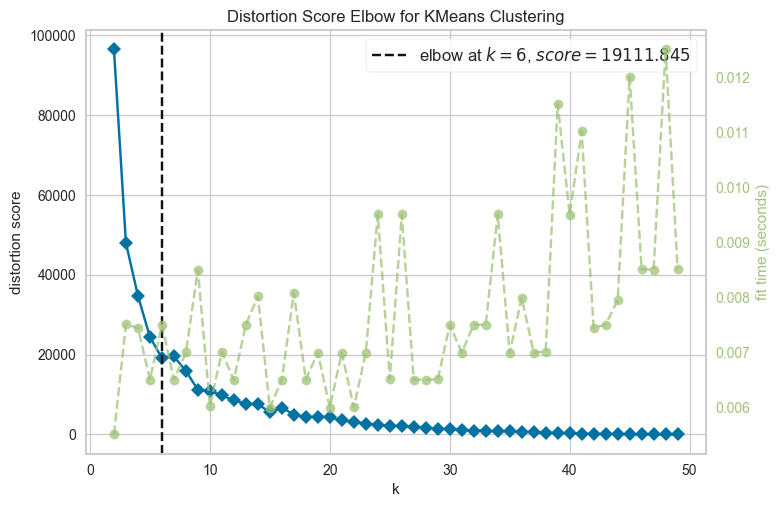

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [104]:
# !pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 50))
visualizer.fit(df) 
# visualizer.poof()
visualizer.show()

In [105]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [106]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,0
6,Connecticut,3
7,Delaware,1
8,Florida,1
9,Georgia,0
